In [1]:
!pwd

/content


In [2]:
import os 
os.chdir('/content/drive/MyDrive/Classroom/Project/Common/ML/')
!pwd

/content/drive/MyDrive/Classroom/Project/Common/ML


In [6]:
!ls

detect_gender_webcam.py		     plot.png
face.jpg			     style_transfer_facecut.png
gender_dataset_face		     test_img
gender_detection.model		     train.py
haarcascade_frontalface_default.xml


In [5]:
os.chdir('Gender-Detection')

In [8]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046383 sha256=3af0ec4f6fa6e37d3cdf5bd3fc83fb1d13aaaef10d40d5a78d2e2d78ec5c6776
  Stored in directory: /root/.cache/pip/wheels/bb/11/55/82ced947752cc4056335a4ee9c304a93d43ce857230538f0ae
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12081 sha256=02ae67cbed4ac4c98b869aef0414f1f817e3fd9a76c61de8fefd9f649a11f2b2
  Stored in directory: /root/.cache/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built cvlib progressbar


In [9]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [ ]:
# !pip install cvlib

In [10]:
model = load_model('gender_detection.model')

classes = ['man','woman']


In [11]:
!pwd

/content/drive/MyDrive/Classroom/Project/Common/ML/Gender-Detection


In [48]:
# test_img='style_transfer_facecut.png'
test_img='test_img.png'
# test_img='test3.png'

In [49]:
img=cv2.imread(test_img, cv2.IMREAD_COLOR)

In [50]:
img.shape

(266, 474, 3)

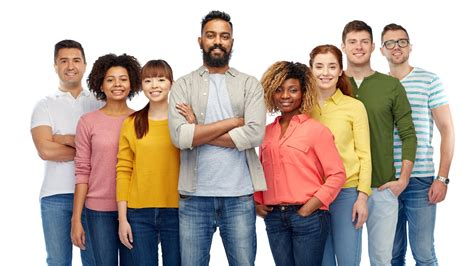

In [51]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [52]:
facedata = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(facedata)

In [53]:
faces = cascade.detectMultiScale(img)
for (x,y,w,h) in faces:
    # Crop and save the face
    face_image = img[y:y+h, x:x+w]
    cv2.imwrite('face.jpg', face_image)

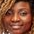

In [55]:
cv2_imshow(face_image)

In [56]:
face_image.shape

(34, 34, 3)

In [57]:
# preprocessing for gender detection model
resized = cv2.resize(face_image, (96,96))
print('resized to :', resized.shape)
normalized = resized.astype("float") / 255.0
print('normalized to :', type(normalized[0,0,0]),'from : ',type(resized[0,0,0]))
img_array = img_to_array(normalized)
face_crop = np.expand_dims(img_array, axis=0)
face_crop.shape

resized to : (96, 96, 3)
normalized to : <class 'numpy.float64'> from :  <class 'numpy.uint8'>


(1, 96, 96, 3)

In [58]:
# apply gender detection on face
conf = model.predict(face_crop)[0] 
conf

1/1 [==============================] - 0s 29ms/step


array([0.50369877, 0.58207136], dtype=float32)

In [59]:
# get label with max accuracy
idx = np.argmax(conf)
label = classes[idx]

label = "{}: {:.2f}%".format(label, conf[idx] * 100)
print(label)

woman: 58.21%
